## Curso de Inteligencia Artificial

### Aprendizaje por Refuerzo


El aprendizaje por Refuerzo (RL) es un dominio de inteligencia artificial (IA) que es diferente de los otros formatos de aprendizaje automático. 

El RL consiste en desarrollar agentes impulsados ​​por objetivos para automatizar la resolución de problemas optimizando sus acciones dentro de un entorno. Esto implica predecir y clasificar los datos disponibles y entrenar a los agentes para ejecutar las tareas con éxito. 

Se pueden distinguir tres tipos diferentes de aprendizaje por refuerzo:

* Basado en valor: una función de valor proporciona una estimación de qué tan bueno es el estado actual del entorno.

* Basado en políticas: donde una función determina una acción basada en un estado.

* Basado en modelos: un modelo del entorno que incluye transiciones de estado, recompensas y planificación de acciones.

Mencionemos los principios fundamentales del aprendizaje por refuerzo. Estos son los cinco principios:

* Principio 1: El sistema de entrada y salida
* Principio 2: Las recompensas
* Principio 3: El entorno de la IA
* Principio 4: Los procesos de decisión de Markov
* Principio 5: Entrenamiento e inferencia

El **agente** es el concepto más importante de cualquier problema de RL. Es la parte del algoritmo RL que procesa la información de entrada para realizar una acción. El agente explora y explota el conocimiento de ensayos repetidos para aprender a maximizar una recompensa.

Generalmente, el agente es una entidad que tiene la capacidad de interactuar con un entorno, y el aprendizaje se realiza aplicando retroalimentación en términos de recompensas acumulativas del entorno para informar acciones futuras.

El escenario al que tiene que enfrentarse el agente se conoce como **entorno**, mientras que las acciones son los posibles movimientos que puede realizar un agente en un entorno determinado. El retorno de un entorno al realizar una acción se denomina **recompensa**  y el curso de acción que aplica el agente para determinar la siguiente acción en función del estado actual se denomina **política**. El rendimiento esperado a largo plazo con un descuento, a diferencia de la recompensa a corto plazo, se denomina **valor**. El **q-valor** es similar al valor pero tiene un parámetro de acción actual adicional. 

### Terminología en RL

* Agente: el aprendiz y quien toma las decisiones. 
* Entorno: donde el agente aprende y decide qué acciones realizar. 
* Acción: conjunto de acciones que puede realizar el agente. 
* Estado: el estado del agente en el entorno.
* Recompensa: por cada acción seleccionada por el agente, el entorno proporciona una recompensa. Suele ser un valor escalar.
* Política: la función de toma de decisiones (estrategia de control) del agente, que representa un mapeo de situaciones a acciones. 
* Función de valor: mapeo de estados a números reales, donde el valor de un  estado representa la recompensa a largo plazo lograda a partir de ese estado y ejecutando una política en particular. 
* Aproximador de funciones: se refiere al problema de inducir una función a partir de ejemplos de entrenamiento. Los aproximadores estándar incluyen árboles de decisión, redes neuronales y métodos del vecino más cercano. 
* Proceso de decisión de Markov (MDP): un modelo probabilístico de un problema de decisión secuencial, donde los estados se pueden percibir exactamente y el estado actual y la acción seleccionada determinan una distribución de probabilidad en estados futuros. Esencialmente, el resultado de aplicar una acción a un estado depende solo de la acción y el estado actuales (y no de las acciones o estados precedentes). 
*Programación dinámica (DP): es una clase de métodos de solución para resolver problemas de decisiones secuenciales con una estructura de costos de composición. Richard Bellman fue uno de los principales fundadores de este enfoque. 
* Métodos de Monte Carlo: una clase de métodos para el aprendizaje de funciones de valor, que estima el valor de un estado ejecutando muchas pruebas comenzando en ese estado, luego promedia las recompensas totales recibidas en esas pruebas.
* Algoritmos de diferencia temporal (TD): una clase de métodos de aprendizaje, basados ​​en la idea de comparar predicciones sucesivas temporalmente. Posiblemente la idea más fundamental de todo el aprendizaje por refuerzo. 
* Modelo: la visión del entorno del agente, que asigna pares de acción de estado a distribuciones de probabilidad entre estados. Ten en cuenta que no todos los agentes de aprendizaje por refuerzo utilizan un modelo de su entorno.


### El problema del Bandido multibrazos (MABP)

si tenemos un bandido con $N$ brazos y cada brazo tiene una probabilidad distinta de darnos una recompensa positiva. El objetivo es crear un agente que maximice esas recompensas.

Si tenemos un bandido de $N=5$ brazos (5-armed bandit) por ejemplo. Si estas son las probabilidades de cada brazo de dar una recompensa positiva: `[0.1, 0.3, 0.05, 0.55, 0.4]`, la mejor acción entre estas cinco es tirar del cuarto brazo. Sin embargo, el agente no dispone de esta información. Por lo tanto, deberá probar a tirar de todos los brazos varias veces, e ir aprendiendo cuál de todos es el mejor. Cuando vaya acumulando más información, empezará a tomar mejores decisiones y a recibir mejores recompensas más frecuentemente.


### Un ejemplo : MABP

Usando RL, un agente decide qué página web presentar al usuario. El entorno es un banco de pruebas que proporcionará comentarios a nuestros agentes (hacer clic o no hacer clic). 

Primero implementaremos nuestro entorno. Estamos considerando esto como un problema *multi-armed bandit*.


In [ ]:
import random
import warnings
warnings.filterwarnings("ignore")
import numpy as np

class Bandido:
  def __init__(self, K=2, probs=None):
    self.K = K
    if probs is None:
      self.probs = [random.random() for _ in range(self.K)]
    else:
      assert len(probs) == K
      self.probs = probs

    self.mejor_probs = max(self.probs)

  def play(self, i):
    if random.random() < self.probs[i]:
      return 1
    else:
      return 0

Implementamos un agente abstracto:

In [ ]:
class Agente:
  def __init__(self, env):
    self.env = env
    self.oyentes = {}
    self.metricas = {}
    self.reset()
        
  def reset(self):
    for k in self.metricas:
      self.metricas[k] = []

  def agrega_oyente(self, nombre, fun):
    self.oyentes[nombre] = fun
    self.metricas[nombre] = []
        
  def ejecutar_metricas(self, i):
    for key, fun in self.oyentes.items():
      fun(self, i, key)

  def ejecutar_un_paso(self):
    raise NotImplementedError
        
  def ejecutar(self, n_pasos):
    raise NotImplementedError

Cualquier agente necesitará un entorno con el que interactuar. Necesita tomar una sola decisión `(ejecutar_un_paso (self))` y, para ver qué tan buena es su toma de decisiones, necesitaremos ejecutar una simulación `(ejecutar (self, n_pasos))`.

El agente contendrá una lista de búsqueda de  métricas y también heredará una funcionalidad de colección de métricas. Podemos ejecutar la colección de métricas a través de la función `ejecutar_metricas(self, i)`.

### UCB1

Como hemos mencionado el MABP, también llamado el problema de los k-bandidos armados, es el problema de la asignación de recursos entre opciones en competencia en una situación, donde los resultados de cada elección se conocen solo parcialmente, pero pueden llegar a ser más conocidos con el tiempo. Cuando se consideran las observaciones del mundo al tomar una decisión, esto se conoce como el **bandido contextual**.

En el código hemos utilizado el algoritmo Upper Confidence Bound versión 1 (UCB1) que funciona de la siguiente manera:

* Realiza cada acción una vez para obtener estimaciones iniciales de las recompensas medias (fase de exploración).

* Para cada ronda $t$, actualiza $Q(a)$ y $N(a)$ y ejecute la acción $a'$ de acuerdo con esta fórmula:

$$\alpha^{'} \leftarrow \text{argmax}_{a \in A} Q(A) + \sqrt{\frac{\alpha \ln t}{N(a)}}$$


donde $Q(a)$ es la tabla de búsqueda para la recompensa media y $N(a)$ es el número de veces que se ha realizado la acción. $\alpha > 0$ es un parámetro.

El segundo término de la ecuación anterior cuantifica la incertidumbre. Cuanto menor sea la incertidumbre, más dependemos de $Q(a)$. La incertidumbre disminuye linealmente con el número de veces que se ha realizado una acción y aumenta logarítmicamente con el número de rondas. 

El algoritmo `Upper Confidence Bound (UCB)` a menudo se expresa como  ‘optimismo frente a la incertidumbre’. Para comprender por qué, considera  que la función de recompensa de cada brazo puede percibirse como una estimación puntual basada en la tasa promedio de recompensa observada. Extrayendo la intuición de los intervalos de confianza, para cada estimación puntual, podemos incorporar alguna forma de límite de incertidumbre alrededor de la estimación puntual. En ese sentido, tenemos tanto el límite inferior como el límite superior para cada brazo. 

Utilizamos una variante al material de Lilien Weng :[The Multi-Armed Bandit Problem and Its Solutions](https://lilianweng.github.io/lil-log/2018/01/23/the-multi-armed-bandit-problem-and-its-solutions.html).



In [ ]:
class UCB1(Agente):
  def __init__(self, env, alpha=2.):
    self.alpha = alpha
    super(UCB1, self).__init__(env)
    
  def ejecutar_exploracion(self):
    for i in range(self.env.K):
      self.estimates[i] = self.env.play(i)
      self.counts[i] += 1
      self.history.append(i)
      self.ejecutar_metricas(i)            
      self.t += 1
    
  def actualiza_estimacion(self, i, r):
    self.estimates[i] += (r - self.estimates[i]) / (self.counts[i] + 1)

  def reset(self):
    self.history = []
    self.t = 0
    self.counts = [0] * self.env.K
    self.estimates = [None] * self.env.K
    super(UCB1, self).reset()
    
  def ejecutar(self, n_pasos):
    assert self.env is not None
    self.reset()
    if self.estimates[0] is None:
      self.ejecutar_exploracion()
    for _ in range(n_pasos):
      i = self.ejecutar_un_paso()
      self.counts[i] += 1
      self.history.append(i)
      self.ejecutar_metricas(i)

  def cota_superior(self, i):
    return np.sqrt(
        self.alpha * np.log(self.t) / (1 + self.counts[i])
      )
   
  def ejecutar_un_paso(self):
    i = max(
            range(self.env.K),
            key=lambda i: self.estimates[i] + self.cota_superior(i)
        )
    r = self.env.play(i)
    self.actualiza_estimacion(i, r)
    self.t += 1
    return i

El agente UCB1 necesita un entorno (un bandido) con el que interactuar y un parámetro alfa único, que sopesa la importancia de explorar acciones (frente a explotar la acción más conocida). El agente mantiene el historial de elecciones a lo largo del tiempo y un registro de estimaciones para cada opción posible.

El método `ejecutar_un_paso(self)`, que hace una sola elección al elegir la mejor opción optimista. El método `ejecutar(self, n_pasos)` ejecuta una serie de opciones y recupera la retroalimentación del entorno.

Hay dos métricas importantes:`regret` que es la suma de las pérdidas esperadas que se produjeron debido a elecciones subóptimas y  como medida de convergencia de las estimaciones del agente con la configuración real del entorno, la correlación de rango de Spearman (`stats.spearmanr()`).

In [ ]:
from scipy import stats

def actualiza_regret(agente, i, key):
  regret = agente.env.mejor_probs - agente.env.probs[i]
  if agente.metricas[key]:
    agente.metricas[key].append(
            agente.metricas[key][-1] + regret
        )
  else:
    agente.metricas[key] = [regret]
        
def actualiza_rank_corr(agente, i, key):
  if agente.t < agente.env.K:
        agente.metricas[key].append(0.0)
  else:
    agente.metricas[key].append(
        stats.spearmanr(agente.env.probs, agente.estimates)[0]
        )

Preparemos los gráficos.

In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt


def dibuja_stats(title):
  df = pd.DataFrame(agente.metricas)
  df['t'] = list(range(len(df)))
  ax = df.plot(x='t', y='regret', legend=False)
  ax2 = ax.twinx()
  ax.spines['left'].set_color('b')
  ax.spines['left'].set_linewidth(1.5)
  ax.tick_params(axis='y', colors='b')

  df.plot(x='t', y='corr', ax=ax2, legend=False, color="r")
  ax.spines['right'].set_color('r')
  ax.spines['right'].set_linewidth(1.5)
  ax2.tick_params(axis='y', colors='r')

  ax.figure.legend(loc='center', bbox_to_anchor=(0.7, 0.5))
  plt.title(title)

Ahora podemos rastrear estas métricas para comparar la influencia del parámetro alfa (más o menos exploración). Entonces podemos observar la convergencia y el regret acumulativo a lo largo del tiempo:

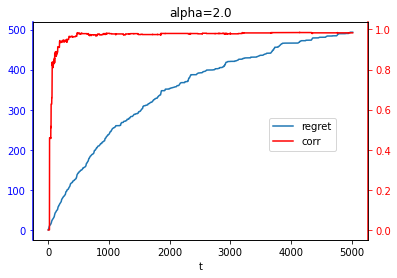

In [ ]:
random.seed(42.0)  
bandit = Bandido(20)
agente = UCB1(bandit, alpha=2.0)
agente.agrega_oyente('regret', actualiza_regret)
agente.agrega_oyente('corr', actualiza_rank_corr)
agente.ejecutar(5000)
dibuja_stats('alpha=2.0')

En el algoritmo UCB o UCB1, no asumimos ningún previo en la distribución de recompensas y por lo tanto, tenemos que confiar en la desigualdad de Hoeffding para una estimación muy generalizada. Si podemos conocer la distribución por adelantado, podríamos hacer una mejor estimación de límites.


### Ejercicio

* Modifica el código anterior, para cuando `alpha = 0.5`. ¿Qué observas?

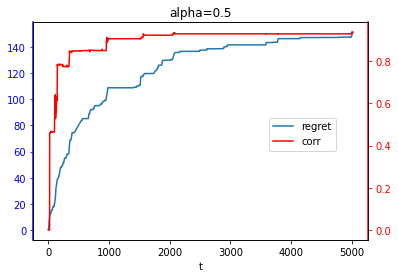

In [ ]:
random.seed(42.0)  
bandit = Bandido(20)
agente = UCB1(bandit, alpha=0.5)
agente.agrega_oyente('regret', actualiza_regret)
agente.agrega_oyente('corr', actualiza_rank_corr)
agente.ejecutar(5000)
dibuja_stats('alpha=0.5')

#### OpenAI

Es una empresa de investigación sin fines de lucro que se centra en la creación de inteligencia artificial general (AGI) segura y en garantizar que beneficie a los humanos. 

**OpenAI Gym** es un conjunto de herramientas de código abierto para desarrollar y comparar algoritmos de aprendizaje por refuerzo. Proporciona una interfaz para una variedad de simulaciones y tareas de aprendizaje por refuerzo, desde caminar hasta alunizaje, carreras de autos hasta jugar juegos de Atari. 

Podemos escribir agentes para interactuar con entornos de OpenAI Gym utilizando cualquier libreríía de cálculo numérico, como PyTorch, TensorFlow o Keras . 


In [ ]:
!sudo apt-get install -y xvfb ffmpeg 
!pip install gym
!pip install 'imageio==2.4.0'
!pip install PILLOW
!pip install 'pyglet==1.5.0'
!pip install pyvirtualdisplay

In [ ]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

### Ejemplos en  OpenAI gym - CartPole

Aquí, implementaremos dos algoritmos RL diferentes.  Necesitaremos un entorno para ejecutar nuestros algoritmos para que el modelo que creemos tenga una recompensa máxima. 

Usaremos la biblioteca gym de OpenAI, que es una colección de entornos que podemos usar para entrenar nuestro modelo. 

CartPole es una tarea de control disponible en OpenAI Gym y se ha estudiado durante muchos años. Aunque es relativamente simple en comparación con otros, contiene todo lo que necesitamos para implementar un algoritmo de aprendizaje por refuerzo.

In [ ]:
from gym import envs
print(envs.registry.all())

dict_values([EnvSpec(Copy-v0), EnvSpec(RepeatCopy-v0), EnvSpec(ReversedAddition-v0), EnvSpec(ReversedAddition3-v0), EnvSpec(DuplicatedInput-v0), EnvSpec(Reverse-v0), EnvSpec(CartPole-v0), EnvSpec(CartPole-v1), EnvSpec(MountainCar-v0), EnvSpec(MountainCarContinuous-v0), EnvSpec(Pendulum-v0), EnvSpec(Acrobot-v1), EnvSpec(LunarLander-v2), EnvSpec(LunarLanderContinuous-v2), EnvSpec(BipedalWalker-v3), EnvSpec(BipedalWalkerHardcore-v3), EnvSpec(CarRacing-v0), EnvSpec(Blackjack-v0), EnvSpec(KellyCoinflip-v0), EnvSpec(KellyCoinflipGeneralized-v0), EnvSpec(FrozenLake-v0), EnvSpec(FrozenLake8x8-v0), EnvSpec(CliffWalking-v0), EnvSpec(NChain-v0), EnvSpec(Roulette-v0), EnvSpec(Taxi-v3), EnvSpec(GuessingGame-v0), EnvSpec(HotterColder-v0), EnvSpec(Reacher-v2), EnvSpec(Pusher-v2), EnvSpec(Thrower-v2), EnvSpec(Striker-v2), EnvSpec(InvertedPendulum-v2), EnvSpec(InvertedDoublePendulum-v2), EnvSpec(HalfCheetah-v2), EnvSpec(HalfCheetah-v3), EnvSpec(Hopper-v2), EnvSpec(Hopper-v3), EnvSpec(Swimmer-v2), EnvSp

### Simulando el entorno ATARI

In [ ]:
!pip install gym[atari]

In [ ]:
import gym

env = gym.make('SpaceInvaders-v0')
env.reset()
env.render()

True

In [ ]:
accion = env.action_space.sample()
nuevo_estado, recompensa, realizado, info = env.step(accion)
print(realizado)

False


In [ ]:
print(info)

{'ale.lives': 3}


In [ ]:
env.render()

True

In [ ]:
realizado = False
while not realizado:
  accion = env.action_space.sample()
  nuevo_estado, recompensa, realizado, info = env.step(accion)
  print(info)
  env.render()

{'ale.lives': 3}
{'ale.lives': 3}
{'ale.lives': 3}
{'ale.lives': 3}
{'ale.lives': 3}
{'ale.lives': 3}
{'ale.lives': 3}
{'ale.lives': 3}
{'ale.lives': 3}
{'ale.lives': 3}
{'ale.lives': 3}
{'ale.lives': 3}
{'ale.lives': 3}
{'ale.lives': 3}
{'ale.lives': 3}
{'ale.lives': 3}
{'ale.lives': 3}
{'ale.lives': 3}
{'ale.lives': 3}
{'ale.lives': 3}
{'ale.lives': 3}
{'ale.lives': 3}
{'ale.lives': 3}
{'ale.lives': 3}
{'ale.lives': 3}
{'ale.lives': 3}
{'ale.lives': 3}
{'ale.lives': 3}
{'ale.lives': 3}
{'ale.lives': 3}
{'ale.lives': 3}
{'ale.lives': 3}
{'ale.lives': 3}
{'ale.lives': 3}
{'ale.lives': 3}
{'ale.lives': 3}
{'ale.lives': 3}
{'ale.lives': 3}
{'ale.lives': 3}
{'ale.lives': 3}
{'ale.lives': 3}
{'ale.lives': 3}
{'ale.lives': 3}
{'ale.lives': 3}
{'ale.lives': 3}
{'ale.lives': 3}
{'ale.lives': 3}
{'ale.lives': 3}
{'ale.lives': 3}
{'ale.lives': 3}
{'ale.lives': 3}
{'ale.lives': 3}
{'ale.lives': 3}
{'ale.lives': 3}
{'ale.lives': 3}
{'ale.lives': 3}
{'ale.lives': 3}
{'ale.lives': 3}
{'ale.lives': 

### REINFORCE

Los métodos de políticas de gradiente encuentran una política con un determinado ascenso de gradiente que maximiza las recompensas acumulativas con respecto a los parámetros de la política.  

El algoritmo REINFORCE que es método basado en políticas y hace uso de una función de política. La función de política se define sobre un entorno $s$ y una acción $a$ y devuelve la probabilidad de una acción dado un entorno. En el caso de $N$ elecciones discretas, podemos usar la función softmax:

$$\pi(a_t = a_i, s_{t-1}) = \frac{e^{p(a_j, s_{t -1})}}{\sum_{j = 0}^N e^{p(a_j, s_{t -1})}}$$

Esto es lo que hemos hecho en nuestra red de políticas y nos ayuda a tomar nuestra decisión de acción.

La función de valor $Q(a_t, s_t) \in \mathbb{R}$ (a veces denotada por $V$) devuelve la recompensa por cualquier acción en un entorno determinado. 

La actualización de la política se define de la siguiente manera:

$$\nabla \theta_{t} = \alpha \nabla \theta_{t}\log \pi(a_t, s_t)Q(a,s)$$

Dónde $\alpha$ es la tasa de aprendizaje.

Después de la inicialización de los parámetros, el algoritmo REINFORCE procede aplicando esta función de actualización cada vez que se ejecuta una acción.


Cargamos el entorno mencionado e imprimimos sus parámetros de la siguiente manera:

In [ ]:
import gym

env = gym.make('CartPole-v1')
print('Espacio observaciones: {}'.format(env.observation_space))
print('Acciones: {}'.format(env.action_space.n))

Espacio observaciones: Box(-3.4028234663852886e+38, 3.4028234663852886e+38, (4,), float32)
Acciones: 2


#### Construimos una red de políticas

In [ ]:
import torch as T
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
class redPoliticas(nn.Module):
    def __init__(self, lr, n_entradas, n_ocultas, n_acciones):
        super(redPoliticas, self).__init__()
        self.lr = lr
        self.fc1 = nn.Linear(n_entradas, n_ocultas)
        self.fc2 = nn.Linear(n_ocultas, n_acciones)
        self.optimizador = T.optim.Adam(self.parameters(), lr=self.lr)
    
        self.device = T.device(
            'cuda:0'
            if T.cuda.is_available()
            else 'cpu:0'
        )
        self.to(self.device)
        
    def forward(self, observacion):
        x = T.Tensor(
            observacion.reshape(-1).astype('float32'),
        ).to(self.device)
        x = T.Tensor(observacion).to(self.device)
        x = F.relu(self.fc1(x))
        x = F.softmax(self.fc2(x), dim=0)
        return x

### Agente

Como se ha mencionados los agentes evalúan las políticas para tomar medidas y obtener recompensas. `gamma` es el factor de descuento.

Con el método `escoge_accion(self, observacion)`, nuestro agente elige una acción dada una observación. La acción se muestrea de acuerdo con la distribución categórica de nuestra red.

El método `ejecutar(self)`  corre una simulación completa en el entorno hasta que se llega al final. Esto es hasta que el poste está a punto de caerse o se alcanzan los `500` pasos (que es el valor predeterminado de `env._max_episode_steps`).

In [ ]:
class Agente:
  eps = np.finfo(np.float32).eps.item()

  def __init__(self, env, lr, params, gamma=0.99, epsilon=0.1):
    self.env = env
    self.gamma = gamma
    self.acciones = []
    self.recompensas = []
    self.politica =redPoliticas(
            lr=lr,
            **params
        )
    
  def ejecutar(self):
    estado = self.env.reset()
    probs = []
    recompensas = []
    hecho = False
    observacion = self.env.reset()
    t = 0
    while not hecho:
      accion, prob = self.escoge_accion(observacion)
      probs.append(prob)
      observacion, recompensa, hecho, _ = self.env.step(accion)
      recompensas.append(recompensa)
      t += 1
    perdida_politica = []
    retornos = []
    R = 0
    for r in recompensas[::-1]:
      R = r + self.gamma * R
      retornos.insert(0, R)
    retornos = T.tensor(retornos)
    retornos = (retornos- retornos.mean()) / (retornos.std() + self.eps)

    for log_prob, R in zip(probs, retornos):
      perdida_politica.append(-log_prob * R)

    if (len(perdida_politica)) > 0:
      self.politica.optimizador.zero_grad()
      perdida_politica = T.stack(perdida_politica, 0).sum()
      perdida_politica.backward()
      self.politica.optimizador.step()
      return t
    
  def escoge_accion(self, observacion):
    salida = self.politica.forward(observacion)
    probs_accion = T.distributions.Categorical(salida)
    accion = probs_accion.sample()
    log_probs = probs_accion.log_prob(accion)
    accion = accion.item()
    self.acciones.append(log_probs)
 
    return accion, log_probs

Probamos a nuestro agente. Comenzaremos a ejecutar nuestro agente en el entorno simulando interacciones con el entorno. 

Para obtener una curva más limpia para nuestra tasa de aprendizaje, estableceremos `env._max_episode_steps en 10000`. Esto significa que la simulación se detiene después de `10,000` pasos.  Si lo dejáramos en `500`, el valor predeterminado, el algoritmo se estabilizaría en un determinado rendimiento o su rendimiento se estancaría una vez que se alcancen unos `500` pasos. En cambio, estamos tratando de optimizar un poco más:


In [ ]:
import gym

env = gym.make('CartPole-v1')  
env._max_episode_steps = 10000
dims_entradas = env.observation_space.low.reshape(-1).shape[0]
n_acciones = env.action_space.n

agente = Agente(
    env=env,
    lr=0.01,
    params=dict(n_entradas=dims_entradas, n_ocultas=10, n_acciones=n_acciones),gamma=0.99,
)

In [ ]:
intervalo_actualizacion = 100
puntuaciones = []
puntuacion = 0
n_episodios = 25000
criterio_detencion = 1000
for i in range(n_episodios):
  puntuacion_media = np.mean(puntuaciones[-intervalo_actualizacion:])
  if (i>0) and (i % intervalo_actualizacion) == 0:
    print('Iteraciones {}, puntuacion promedio: {:.3f}'.format(i, puntuacion_media))

  puntuacion = agente.ejecutar()
  puntuaciones.append(puntuacion)
  if puntuacion >= criterio_detencion:
    print('Detencion. Iteracion  {}, puntuacion promedio: {:.3f}'.format(i, puntuacion_media))
    break

Iteraciones 100, puntuacion promedio: 32.860
Detencion. Iteracion  163, puntuacion promedio: 144.160


Mientras se realizan las simulaciones, vemos actualizaciones cada 100 iteraciones con puntajes promedio desde la última actualización. Nos detenemos una vez que se alcanza una puntuación de 1.000. Esta es nuestra puntuación a lo largo del tiempo:

Text(0, 0.5, 'Puntuaciones')

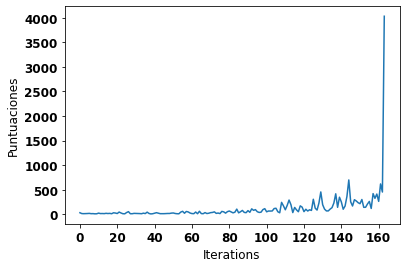

In [ ]:
%matplotlib inline

import matplotlib
from matplotlib import pyplot as plt

## 
font = {'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)
plt.plot(puntuaciones)
plt.xlabel('Iterations')
plt.ylabel('Puntuaciones')


¿Qué observas?

In [ ]:
## Tu respuesta

### Implementando  políticas de gradientes 

Damos una breve implementación de PyTorch de un algoritmo de políticas de gradiente (revisar la segunda presentación de RL de la clase) [https://github.com/openai/spinningup/blob/master/spinup/examples/pytorch/pg_math/1_simple_pg.py](https://github.com/openai/spinningup/blob/master/spinup/examples/pytorch/pg_math/1_simple_pg.py). Tiene solo 128 líneas, por lo que te recomendamos leerlo en profundidad. 

Explica las siguiente líneas de código:

```
logits_net = mlp(sizes=[obs_dim]+hidden_sizes+[n_acts])

def get_policy(obs):
    logits = logits_net(obs)
    return Categorical(logits=logits)

def get_action(obs):
    return get_policy(obs).sample().item()
```

*Tu respuesta*

```
def compute_loss(obs, act, weights):
    logp = get_policy(obs).log_prob(act)
    return -(logp * weights).mean()

```

*Tu respuesta*

```
def train_one_epoch():
    batch_obs = []          
    batch_acts = []         
    batch_weights = []      
    batch_rets = []         
    batch_lens = []         

    obs = env.reset()       
    done = False            
    ep_rews = []          

    finished_rendering_this_epoch = False

    while True:

        if (not finished_rendering_this_epoch) and render:
            env.render()

        batch_obs.append(obs.copy())

        act = get_action(torch.as_tensor(obs, dtype=torch.float32))
        obs, rew, done, _ = env.step(act)

        batch_acts.append(act)
        ep_rews.append(rew)

        if done:
            ep_ret, ep_len = sum(ep_rews), len(ep_rews)
            batch_rets.append(ep_ret)
            batch_lens.append(ep_len)

            batch_weights += [ep_ret] * ep_len

            obs, done, ep_rews = env.reset(), False, []
            finished_rendering_this_epoch = True

            if len(batch_obs) > batch_size:
                break

    optimizer.zero_grad()
    batch_loss = compute_loss(obs=torch.as_tensor(batch_obs, dtype=torch.float32), act=torch.as_tensor(batch_acts, dtype=torch.int32),
    weights=torch.as_tensor(batch_weights, dtype=torch.float32)
                              )
    batch_loss.backward()
    optimizer.step()
    return batch_loss, batch_rets, batch_lens
```

*Tu respuesta*

### Implementación de la política de gradiente de recompensa para llevar 

Proporcionamos una breve implementación de PyTorch de la política de gradiente de recompensa para llevar: [https://github.com/openai/spinningup/blob/master/spinup/examples/pytorch/pg_math/2_rtg_pg.py](https://github.com/openai/spinningup/blob/master/spinup/examples/pytorch/pg_math/2_rtg_pg.py).

Lo único que hemos cambiado de lo anterior, es que ahora usamos diferentes pesos en la función de pérdida. La modificación del código es muy simple: agregamos una nueva función y cambiamos otras dos líneas. 

La nueva función es:

```
def reward_to_go(rews):
    n = len(rews)
    rtgs = np.zeros_like(rews)
    for i in reversed(range(n)):
        rtgs[i] = rews[i] + (rtgs[i+1] if i+1 < n else 0)
    return rtgs
``` 

Explica esos cambios.



*Tu respuesta*